# ¿Cómo vibra un tambor cuando lo golpeas?
> Analizar el problema de la membrana vibrante permite entender el funcionamiento de instrumentos de percusión tales como los tambores, timbales e incluso sistemas biológicos como el tímpano.

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/1/15/Drum_vibration_mode01.gif" width="300px" height="100px" />

Referencias:
 - https://en.wikipedia.org/wiki/Bessel_function
 - https://es.wikipedia.org/wiki/Vibraciones_de_una_membrana_circular
 - https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/special.html

___


## Modelo y solución general

Considere un tambor _(membrana)_ de radio $a$, entonces la función de onda en $\mathbb{R}^2$ para este sistema se puede escribir como,

$$ \frac{1}{v^2}\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} $$

donde $u\equiv u(x,y,t)$ es el desplazamiento transversal_(elevación)_ y $v$ es la rapidez de propagación de la onda. 

La forma habitual de encontrar la solución a esta ecuación es primero hacer un cambio de coordenadas, de cartesianas a polares $(x,y,t)\to(r,\theta,t)$. En estas coordenadas, la ecuación queda:

$$ \frac{1}{v^2}\frac{\partial^2 u}{\partial t^2} = \frac{\partial^2 u}{\partial r^2} + \frac{1}{r}\frac{\partial u}{\partial r} + \frac{1}{r^2}\frac{\partial^2 u}{\partial \theta^2},$$

para $0\leq r<a$, $0\leq\theta<2\pi$ y con $u(a,\theta,t)=0$.

Posteriormente se considera el método de separación de variable. Es decir, buscamos soluciones de la forma

$$ u(r, \theta, t) = R(r) \Theta(\theta) T(t).$$

Esta sustitución da como resultado tres ecuaciones diferenciales, una para cada variable de separación. Al resolver y sustituir en la función de arriba, se obtienen los llamados **modos normales**.

$$u_{nk}(r,\theta, t) = J_{n}(\lambda_{nk} r)(a_{nk}\cos{n\theta} + b_{nk}\sin{n\theta})\cos{(v\lambda_{nk}t)}$$
$$u^{*}_{nk}(r,\theta, t) = J_{n}(\lambda_{nk}r)(a^{*}_{nk}\cos{n\theta} + b^{*}_{nk}\sin{n\theta})\sin{(v\lambda_{nk}t)}),$$

para $n = 0,1,2,\dots$, $k = 1,2,3,\dots$, donde $J_{n}$ es la **función de Bessel** de orden $n$ de primera clase.  Además,

$$\lambda_{nk} = \frac{\alpha_{nk}}{a}$$


donde $\alpha_{nk}$ es el k-ésimo cero de $J_{n}(\lambda a)=0$. Esto es consecuencia de que $u$ sea cero en la frontera de la membrana, $r = a$. 

Los coeficientes $a_{nk} , b_{nk}, a^{*}_{nk}$ y $b^{*}_{nk}$ se determinan de tal forma que cumplan con las condiciones iniciales: 

$$u(r,\theta, 0) = f(r,\theta)$$
$$u_{t}(r,\theta, 0) = g(r,\theta)$$

donde el primer termino es la geometría inicial y el segundo la rapidez inicial. Se puede demostrar que las expresiones para estos coeficientes se pueden escribir como: 

\begin{align}
a_{0k} &= \frac{1}{\pi a^2 J_{1}^{2}(\alpha_{0k})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{0}(\lambda_{0k}r)\, r \, dr \, d\theta\\
a_{nk} &= \frac{2}{\pi a^2 J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{n}(\lambda_{nk}r)\cos(n\theta)\, r \, dr \, d\theta\\
b_{nk} &= \frac{2}{\pi a^2 J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{n}(\lambda_{nk}r)\sin(n\theta)\, r \, dr \, d\theta
\end{align}

Y similarmente, 

\begin{align}
a^{*}_{0k} &= \frac{1}{\pi \,v\, \alpha_{0k}\,a J_{1}^{2}(\alpha_{0k})}\int_{0}^{2\pi}\int_{0}^{a}\; g(r,\theta)\, J_{0}(\lambda_{0k}r)\, r \, dr \, d\theta\\
a^{*}_{nk} &= \frac{2}{\pi\, v\,\alpha_{0k}\, a J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; g(r,\theta)\, J_{n}(\lambda_{nk}r)\cos(n\theta)\, r \, dr \, d\theta\\
b^{*}_{nk} &= \frac{2}{\pi\, v\,\alpha_{0k}\, a J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; g(r,\theta)\, J_{n}(\lambda_{nk}r)\sin(n\theta)\, r \, dr \, d\theta
\end{align}

Tenemos entonces infinitas soluciones (explicar porqué). Para considerarlas todas, las sumamos:

\begin{align}
u(r,\theta, t) &= \sum_{n=0}^{\infty}\sum_{k = 1}^{\infty}J_{n}(\lambda_{nk} r)(a_{nk}\cos{n\theta} + b_{nk}\sin{n\theta})\cos{(v\lambda_{nk}t)}\\
&+  \sum_{n=0}^{\infty}\sum_{k = 1}^{\infty}J_{n}(\lambda_{nk}r)(a^{*}_{nk}\cos{n\theta} + b^{*}_{nk}\sin{n\theta})\sin{(v\lambda_{nk}t)}).
\end{align}

Estamos familiarizados con la función `coseno`, pero no tanto con la función de Bessel. Entonces, nuestra primera actividad será conocer su comportamiento. 

In [2]:
# Importamos todas las librerías que usaremos. Explicación...
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import special
import numpy as np
from ipywidgets import *

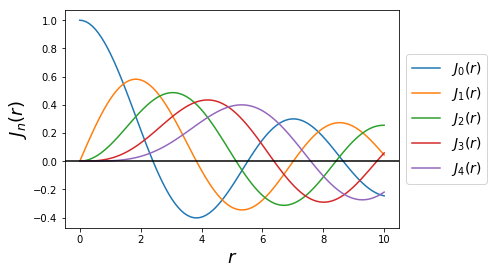

In [3]:
# Graficamos funciones de Bessel de orden n = 0,1,...,4
r = np.linspace(0, 10,100)
for n in range(5):
    plt.plot(r, special.jn(n, r), label = '$J_{%s}(r)$'%n)
plt.xlabel('$r$', fontsize = 18)
plt.ylabel('$J_{n}(r)$', fontsize = 18)
plt.axhline(y = 0, color = 'k')                    # Para graficar lineas horizontales
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 14})
plt.show()

Por simplicidad vamos a suponer  que $a = 1$ y  determinar los ceros, significa encontrar todas las intersecciones de las curvas anteriores con el eje horizontal. 

### Ejemplo: Caso radialmente simétrico

Suponga que $a = 1$, $v = 1$ y que las condiciones iniciales son (no dependen de theta): 

$$ f(r,\theta) = 1- r^4\quad\quad g(r,\theta) = 0$$

**¿Cómo luce el tambor en su condición inicial?**

In [4]:
def f_shape(r):
    return 1 - r**4

In [5]:
a = 1
r = np.linspace(0, 1, 100)
angle = np.linspace(0, 2*np.pi, 200)
r_shape = f_shape(r)

In [6]:
# Explicación de los siguientes comandos...
u = np.array([np.full(len(angle), radi) for radi in r_shape])
x = np.array([var_r * np.cos(angle) for var_r in r])
y = np.array([var_r * np.sin(angle) for var_r in r])

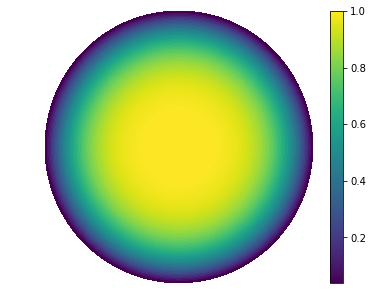

In [7]:
# ¿Cómo se grafica en polares?
plt.figure(figsize = (6, 5))
plt.pcolor(x, y, u, cmap = 'viridis')
plt.axis('off')
plt.colorbar()
plt.show()

Dado que la rapidez inicial es cero, entonces $a^{*}_{nk} = b^{*}_{nk} = 0$, y la solución para el desplazamiento en el tiempo es simplemente,

\begin{equation}
u(r,\theta, t) = \sum_{n=0}^{\infty}\sum_{k = 1}^{\infty}J_{n}(\lambda_{nk} r)(a_{nk}\cos{n\theta} + b_{nk}\sin{n\theta})\cos{(v\lambda_{nk}t)}
\end{equation}

Entonces, solo será necesario encontrar $a_{nk}$ y $b_{nk}$.

\begin{align}
a_{0k} &= \frac{1}{\pi a^2 J_{1}^{2}(\alpha_{0k})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{0}(\lambda_{0k}r)\, r \, dr \, d\theta\\
a_{nk} &= \frac{2}{\pi a^2 J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{n}(\lambda_{nk}r)\cos(n\theta)\, r \, dr \, d\theta\\
b_{nk} &= \frac{2}{\pi a^2 J_{n+1}^{2}(\alpha_{nk})}\int_{0}^{2\pi}\int_{0}^{a}\; f(r,\theta)\, J_{n}(\lambda_{nk}r)\sin(n\theta)\, r \, dr \, d\theta
\end{align}

Para resolver estas integrales haremos uso de `SymPy`.

**Iniciemos con $a_{nk}$.**

In [17]:
# Para imprimir con fotmato LaTeX
from sympy import init_printing; init_printing(use_latex='mathjax')
import sympy as sym

In [18]:
sym.var('r theta', real = True)
#r, theta, k  = sym.symbols('r theta k')
r, theta

(r, θ)

In [19]:
sym.var('n k', positive = True, integer=True)
#n, k = sym.symbols('n k', positive = True, integer=True)
n, k

(n, k)

In [20]:
def lamb(n,k):
    return sym.Symbol('lambda_%s%s'%(n,k), positive = True, real = True)

In [21]:
lamb(0,k)

λ₀ₖ

In [22]:
f = 1 - r**4; f

   4    
- r  + 1

In [23]:
integrand = f * sym.besselj(n, lamb(n,k) * r) * sym.cos(n *theta) * r
integrand

  ⎛   4    ⎞                           
r⋅⎝- r  + 1⎠⋅cos(n⋅θ)⋅besselj(n, λₙₖ⋅r)

In [24]:
ank = sym.Integral(integrand, (r, 0, 1), (theta, 0, 2*sym.pi))
ank

2⋅π 1                                              
 ⌠  ⌠                                              
 ⎮  ⎮   ⎛   4    ⎞                                 
 ⎮  ⎮ r⋅⎝- r  + 1⎠⋅cos(n⋅θ)⋅besselj(n, λₙₖ⋅r) dr dθ
 ⌡  ⌡                                              
 0  0                                              

In [16]:
solution_ank = ank.doit()
solution_ank

0

Entonces para cualquier $n>0$ no se tiene contribución. 

**Evaluamos entonces $a_{0k}$.**

In [23]:
integ = lambda n: f * sym.besselj(n, lamb(n,k) * r) * sym.cos(n*theta) * r

In [24]:
integ(0)

  ⎛   4    ⎞                  
r⋅⎝- r  + 1⎠⋅besselj(0, λ₀ₖ⋅r)

In [25]:
a0k = sym.Integral(integ(0), (r, 0, 1), (theta, 0, 2*sym.pi))
a0k

2⋅π 1                                     
 ⌠  ⌠                                     
 ⎮  ⎮   ⎛   4    ⎞                        
 ⎮  ⎮ r⋅⎝- r  + 1⎠⋅besselj(0, λ₀ₖ⋅r) dr dθ
 ⌡  ⌡                                     
 0  0                                     

In [34]:
solution_a0k = a0k.doit()
solution_a0k

    ⎛  4⋅besselj(0, λ₀ₖ)   16⋅besselj(1, λ₀ₖ)   32⋅besselj(0, λ₀ₖ)   64⋅bessel
2⋅π⋅⎜- ───────────────── + ────────────────── + ────────────────── - ─────────
    ⎜            2                   3                    4                   
    ⎝         λ₀ₖ                 λ₀ₖ                  λ₀ₖ                  λ₀

j(1, λ₀ₖ)⎞
─────────⎟
 5       ⎟
ₖ        ⎠

In [35]:
a0k_solution = solution_a0k/(sym.pi*sym.besselj(1, lamb(0,k))**2)
a0k_solution

  ⎛  4⋅besselj(0, λ₀ₖ)   16⋅besselj(1, λ₀ₖ)   32⋅besselj(0, λ₀ₖ)   64⋅besselj(
2⋅⎜- ───────────────── + ────────────────── + ────────────────── - ───────────
  ⎜            2                   3                    4                    5
  ⎝         λ₀ₖ                 λ₀ₖ                  λ₀ₖ                  λ₀ₖ 
──────────────────────────────────────────────────────────────────────────────
                                          2                                   
                                   besselj (1, λ₀ₖ)                           

1, λ₀ₖ)⎞
───────⎟
       ⎟
       ⎠
────────
        
        

In [36]:
sym.simplify(a0k_sol)

  ⎛     3                        2                                            
8⋅⎝- λ₀ₖ ⋅besselj(0, λ₀ₖ) + 4⋅λ₀ₖ ⋅besselj(1, λ₀ₖ) + 8⋅λ₀ₖ⋅besselj(0, λ₀ₖ) - 1
──────────────────────────────────────────────────────────────────────────────
                                        5        2                            
                                     λ₀ₖ ⋅besselj (1, λ₀ₖ)                    

                 ⎞
6⋅besselj(1, λ₀ₖ)⎠
──────────────────
                  
                  

**Ahora $b_{nk}$.**

In [29]:
integrand_b = f * sym.besselj(n, lamb(n,k) * r) * sym.sin(n *theta) * r
integrand_b

  ⎛   4    ⎞                           
r⋅⎝- r  + 1⎠⋅sin(n⋅θ)⋅besselj(n, λₙₖ⋅r)

In [30]:
bnk = sym.Integral(integrand_b, (r, 0, 1), (theta, 0, 2*sym.pi))
bnk

2⋅π 1                                              
 ⌠  ⌠                                              
 ⎮  ⎮   ⎛   4    ⎞                                 
 ⎮  ⎮ r⋅⎝- r  + 1⎠⋅sin(n⋅θ)⋅besselj(n, λₙₖ⋅r) dr dθ
 ⌡  ⌡                                              
 0  0                                              

In [31]:
solution_bnk = bnk.doit()
solution_bnk

0

\begin{equation}
u(r,\theta, t) = \sum_{k = 1}^{\infty} a_{0k}J_{0}(\lambda_{0k} r)\cos{(v\lambda_{0k}t)}
\end{equation}

In [37]:
a0k_solution

  ⎛  4⋅besselj(0, λ₀ₖ)   16⋅besselj(1, λ₀ₖ)   32⋅besselj(0, λ₀ₖ)   64⋅besselj(
2⋅⎜- ───────────────── + ────────────────── + ────────────────── - ───────────
  ⎜            2                   3                    4                    5
  ⎝         λ₀ₖ                 λ₀ₖ                  λ₀ₖ                  λ₀ₖ 
──────────────────────────────────────────────────────────────────────────────
                                          2                                   
                                   besselj (1, λ₀ₖ)                           

1, λ₀ₖ)⎞
───────⎟
       ⎟
       ⎠
────────
        
        

**Primero vamos a programar para algún modo $k$. **

In [27]:
def a0k_sym(lambd):
    solucion = 2*(-4*special.jn(0, lambd)/lambd**2 
    +16*special.jn(1, lambd)/lambd**3 + 
     32*special.jn(0, lambd)/lambd**4 -
        64*special.jn(1, lambd)/lambd**5)/special.jn(1, lambd)**2
    return solucion

In [39]:
def tambor(v, kth_zero, nt, t):
    r = np.r_[0:1:100j]
    angle = np.r_[0:2*np.pi:200j]
    ceros = special.jn_zeros(0, nt)
    lambd = ceros[kth_zero]
    u_r = a0k_sym(lambd)*special.jn(0, lambd * r) * np.cos(lambd * v * t)
    u = np.array([np.full(len(angle), u_rs) for u_rs in u_r])
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u

In [40]:
x1, y1, u1 = tambor(1, 0, 15, 7)

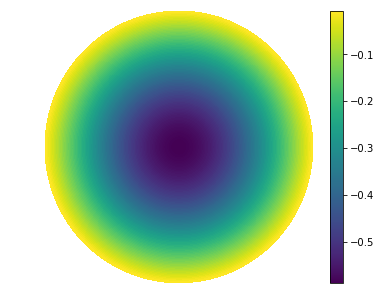

In [41]:
plt.figure(figsize = (6, 5))
plt.pcolor(x1 , y1 , u1, cmap = 'viridis')
plt.axis('off')
plt.colorbar()
plt.show()

In [43]:
def tambor_nk(t = 0, kth=0):
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_subplot(1, 1, 1)
    x, y, u = tambor(1, kth, 50, t)
    im = ax.pcolor(x, y, u, cmap = 'viridis')
    ax.set_xlim(xmin = -1.1, xmax = 1.1)
    ax.set_ylim(ymin = -1.1, ymax = 1.1)
    plt.colorbar(im)
    plt.axis('off')
    fig.canvas.draw()
interact_manual(tambor_nk, t = (0, 15,.01), kth = (0, 10, 1));

**Y ahora, la solución completa.**

No podemos sumar infinitos términos. Pero sí tantos como queramos...

In [28]:
def tambor_n_allk(v, nk_zeros, t):
    r = np.linspace(0, 1, 100)
    angle = np.linspace(0, 2*np.pi, 200)
    ceros = special.jn_zeros(0, nk_zeros)
    lambd = ceros[0]
    u_r = a0k_sym(lambd)*special.jn(0, lambd * r) * np.cos(lambd * v * t)
    u0 = np.array([np.full(len(angle), u_rs) for u_rs in u_r])
    for cero in range(1, nk_zeros):
        lambd = ceros[cero]
        u_r = a0k_sym(lambd)*special.jn(0, lambd * r) * np.cos(lambd * v * t)
        u = np.array([np.full(len(angle), u_rs) for u_rs in u_r])
        u0 += u
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u0

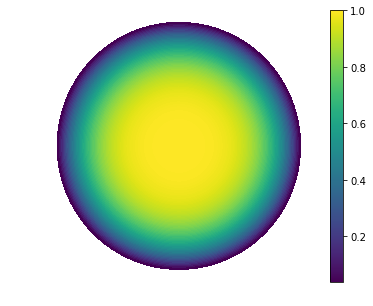

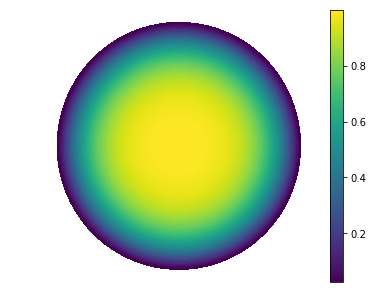

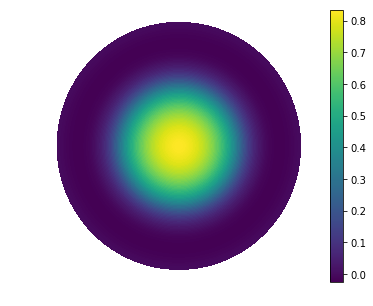

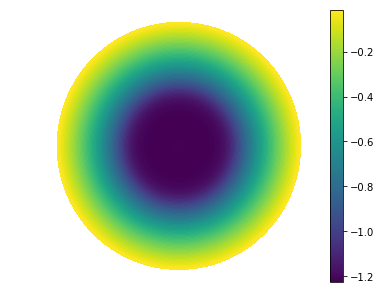

In [29]:
def tambor_0(t = 0):
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_subplot(1, 1, 1)
    x, y, u = tambor_n_allk(1, 15, t)
    im = ax.pcolor(x, y, u, cmap = 'viridis')
    ax.set_xlim(xmin = -1.1, xmax = 1.1)
    ax.set_ylim(ymin = -1.1, ymax = 1.1)
    plt.colorbar(im)
    plt.axis('off')
    fig.canvas.draw()
interact_manual(tambor_0, t = (0, 15,.01));

Fíjise bien, la condición inicial en $t = 0$, se cumple para la  solución encontrada. 

### Tarea

- Suponga que $a = 1$, $v = 1$ y que las condiciones iniciales son: 

$$ f(r,\theta) = (1- r^4)\cos(\theta)\quad\quad g(r,\theta) = 0$$



## Fin Modulo 1

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Lázaro Alonso. Modified by Esteban Jiménez Rodríguez.
</footer>

### Versión antigua (Lo único que tal vez sirva de algo, son los programas)
Tal vez sirvan de algo para sus tareas. 

Entonces, primero veamos algunos modos normales del sistema. Por ejemplo(demasiado simplificado), 

$$u(r,\theta, t)_{nk} = J_{n}(\lambda_{nk} r)\,\cos(n\theta)\,\cos(\lambda_{nk} v t)$$

La siguiente función se aplica caso simplificado. 

In [3]:
def tambor(n, r_max, v, kth_zero, nt, t):
    r = np.r_[0:r_max:100j]
    angle = np.r_[0:2*np.pi:200j]
    ceros = special.jn_zeros(0, nt)
    lamb = ceros[kth_zero]
    u = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle) 
                 * np.cos(lamb * v * t) for var_r in r])
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u

Entonces, por ejemplo si $n = 1$, $a = 1$, $v = 1$,  $k = 1$ y $t= 0$. Este sería el modo de vibración $(n,k)\rightarrow (1,1)$.

In [4]:
x, y, u = tambor(1, 1, 1, 0, 15, 0)

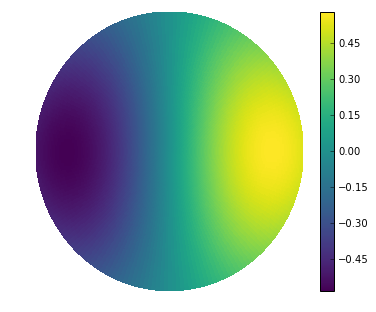

In [5]:
plt.figure(figsize = (6, 5))
plt.pcolor(x, y, u, cmap = 'viridis')
plt.axis('off')
plt.colorbar()
plt.show()

Ahora, veamos como lucen todos demás modos de vibración $(n,k)$. 

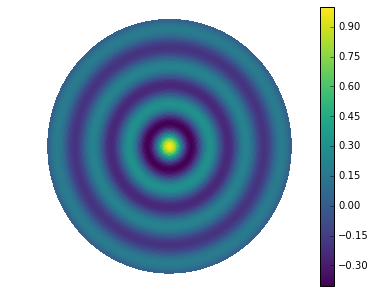

In [6]:
def tambor_nk(t = 0, n = 0, kth=0):
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_subplot(1, 1, 1)
    x, y, u = tambor(n, 1, 1, kth, 15, t)
    im = ax.pcolor(x, y, u, cmap = 'viridis')
    ax.set_xlim(xmin = -1.1, xmax = 1.1)
    ax.set_ylim(ymin = -1.1, ymax = 1.1)
    plt.colorbar(im)
    plt.axis('off')
    fig.canvas.draw()
interact_manual(tambor_nk, t = (0, 15,.01), n = (0, 10, 1), kth = (0, 10, 1));

Ahora, tal vez nos interesaría conocer el comportamiento de la membrana cuando sumamos sobre un conjunto de modos $k$. Es decir, 

$$u(r,\theta, t)_{n} =\sum_{k = 1}u(r,\theta, t)_{nk} =  \sum_{k = 1}J_{n}(\lambda_{nk} r)\,\cos(n\theta)\,\cos(\lambda_{nk} v t) $$
La manera usual de hacer esto es considerar la suma en series de Fourier, es decir a esta suma le falta un coeficiente $A_{nk}$, pero por simplicidad aquí no vamos a considerar este término. 

Una posible función para realizar esto sería, 

In [7]:
def tambor_n_allk(n, r_max, v, nk_zeros, t):
    r = np.r_[0:r_max:100j]
    angle = np.r_[0:2*np.pi:200j]
    ceros = special.jn_zeros(0, nk_zeros)
    lamb = ceros[0]
    u0 = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle)
                  * np.cos(lamb * v * t) for var_r in r])
    for cero in range(1, nk_zeros):
        lamb = ceros[cero]
        u = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle) 
                 * np.cos(lamb * v * t) for var_r in r])
        u0 += u
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u0

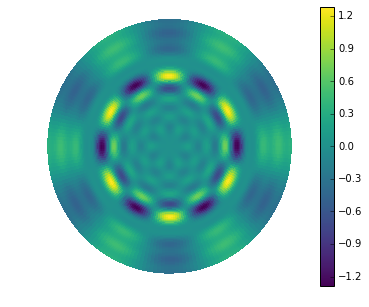

In [8]:
def tambor_n(t = 0, n = 0):
    fig = plt.figure(figsize = (6,5))
    ax = fig.add_subplot(1, 1, 1)
    x, y, u = tambor_n_allk(n, 1, 1, 15, t)
    im = ax.pcolor(x, y, u, cmap = 'viridis')
    ax.set_xlim(xmin = -1.1, xmax = 1.1)
    ax.set_ylim(ymin = -1.1, ymax = 1.1)
    plt.colorbar(im)
    plt.axis('off')
    fig.canvas.draw()
interact_manual(tambor_n, t = (0, 15,.01), n = (0, 10, 1));

Por último, nos queda el caso cuando sumamos sobre todos los modos $n$. Es decir, 

In [37]:
def order_n(n, ceros, nk_zeros, angle, v, r, t):
    lamb = ceros[0]
    u0 = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle)
                      * np.cos(lamb * v * t) for var_r in r])
    for cero in range(1, nk_zeros):
        lamb = ceros[cero]
        u = np.array([special.jn(n, lamb* var_r) * np.cos(n * angle) 
                     * np.cos(lamb * v * t) for var_r in r])
        u0 += u
    return u0

In [38]:
def tambor(orden_n, r_max, v, nk_zeros, t):
    r = np.r_[0:r_max:100j]
    angle = np.r_[0:2*np.pi:100j]
    ceros = special.jn_zeros(0, nk_zeros)
    u0 = order_n(0, ceros, nk_zeros,  angle, v, r, t)
    for n in range(1, orden_n):
        u = order_n(n, ceros, nk_zeros, angle, v, r, t)
        u0 += u
    x = np.array([var_r * np.cos(angle) for var_r in r])
    y = np.array([var_r * np.sin(angle) for var_r in r])
    return x, y, u0

In [63]:
x, y, u = tambor(10, 1, 1, 5, 5)

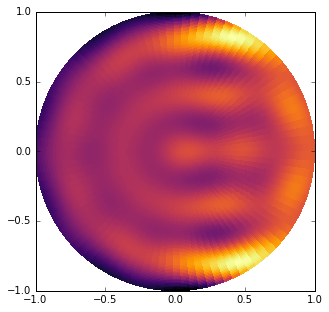

In [64]:
plt.figure(figsize = (5, 5))
plt.pcolor(x, y, u, cmap = 'inferno')
plt.axis('on')
plt.show()